# Regression & Its Evaluation — Assignment


---




## Question 1: What is Simple Linear Regression?

**Answer:**

Simple Linear Regression models the linear relationship between a **single independent variable** (X) and a **dependent variable** (Y). The model assumes:

\[ Y = \beta_0 + \beta_1 X + \varepsilon \]

where \(\beta_0\) is intercept, \(\beta_1\) is slope, and \(\varepsilon\) is the error term. The coefficients are typically estimated by Ordinary Least Squares (OLS) which minimizes the sum of squared residuals.

## Question 2: What are the key assumptions of Simple Linear Regression?

**Answer:**

1. **Linearity:** Relationship between X and Y is linear in parameters.
2. **Independence:** Observations (errors) are independent.
3. **Homoscedasticity:** Constant variance of errors across X.
4. **Normality of errors:** Residuals are normally distributed (important for inference).
5. **No perfect multicollinearity:** (for multiple regression) predictors are not perfectly correlated.
6. **Exogeneity:** Errors have zero mean and are uncorrelated with predictors.

## Question 3: What is heteroscedasticity, and why is it important to address in regression models?

**Answer:**

Heteroscedasticity means non-constant variance of residuals across levels of an independent variable or fitted values. It causes OLS estimates to be unbiased but standard errors to be inconsistent, which invalidates hypothesis tests. Remedies include transforming the target (e.g., log), using robust standard errors, or using Weighted Least Squares (WLS).

## Question 4: What is Multiple Linear Regression?

**Answer:**

Multiple Linear Regression models the relationship between a dependent variable and **multiple** independent variables:

\[ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \varepsilon \]

Interpretation of coefficients is *ceteris paribus* (effect of Xi holding others constant). Watch for multicollinearity and other OLS assumptions.

## Question 5: What is polynomial regression, and how does it differ from linear regression?

**Answer:**

Polynomial regression includes polynomial terms of predictors, e.g., X, X^2, X^3, but remains linear in coefficients \(\beta\). For example:

\[ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \varepsilon \]

It allows modeling nonlinear relationships while using linear regression machinery. Control degree to avoid overfitting and use cross-validation.

## Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:

  X = [1, 2, 3, 4, 5]

  Y = [2.1, 4.3, 6.1, 7.9, 10.2]
  
Plot the regression line over the data points.

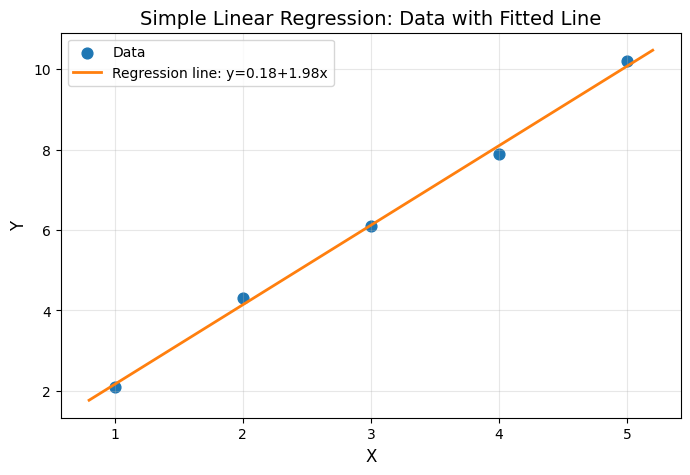

Intercept (beta0): 0.18
Slope (beta1): 1.98
R^2: 0.9979


In [1]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([2.1,4.3,6.1,7.9,10.2])

model = LinearRegression().fit(X,y)
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X,y)

plt.figure(figsize=(8,5))
plt.scatter(X.flatten(), y, label='Data', s=60)
xs = np.linspace(0.8,5.2,200).reshape(-1,1)
ys = model.predict(xs)
plt.plot(xs, ys, color='tab:orange', linewidth=2, label=f'Regression line: y={intercept:.2f}+{slope:.2f}x')
plt.title('Simple Linear Regression: Data with Fitted Line', fontsize=14)
plt.xlabel('X', fontsize=12); plt.ylabel('Y', fontsize=12)
plt.legend(); plt.grid(alpha=0.3)
plt.show()

print('Intercept (beta0):', round(intercept,4))
print('Slope (beta1):', round(slope,4))
print('R^2:', round(r2,4))

## Question 7: Fit a Multiple Linear Regression model on this sample data:
   Area = [1200, 1500, 1800, 2000]

   Rooms = [2, 3, 3, 4]

  Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

 (Include your Python code and output in the code box below.)

In [2]:
import pandas as pd, numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

area = np.array([1200,1500,1800,2000])
rooms = np.array([2,3,3,4])
price = np.array([250000,300000,320000,370000])

df = pd.DataFrame({'area':area,'rooms':rooms,'price':price})
X = df[['area','rooms']]
y = df['price']

model = LinearRegression().fit(X,y)
print('Coefficients:', dict(zip(X.columns, model.coef_.round(6))))
print('Intercept:', model.intercept_)

X_const = add_constant(X)
vif_data = pd.DataFrame({'feature': X_const.columns,
                         'VIF': [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]})
vif_data

Coefficients: {'area': np.float64(63.157895), 'rooms': np.float64(34736.842105)}
Intercept: 103157.89473684214


,feature,VIF
0,const,34.210526
1,area,7.736842
2,rooms,7.736842


## Question 8: Implement polynomial regression on the following data:
  X = [1, 2, 3, 4, 5]

  Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.

(Include your Python code and output in the code box below.)

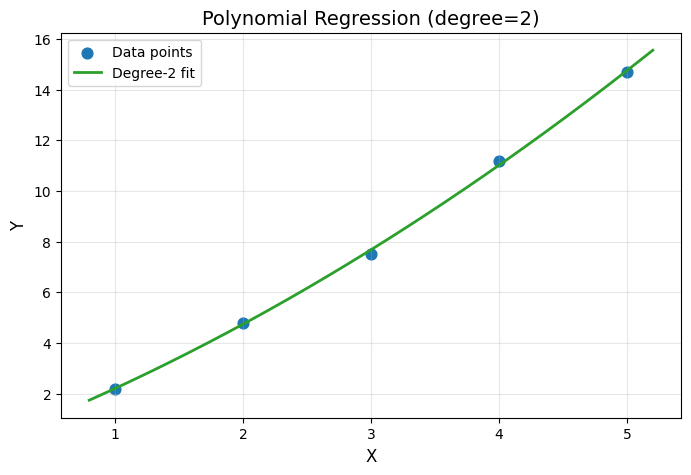

Coefficients (linear model on poly features): [1.94 0.2 ]
Intercept: 0.06


In [3]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([2.2,4.8,7.5,11.2,14.7])

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

xs = np.linspace(0.8,5.2,200).reshape(-1,1)
xs_poly = poly.transform(xs)
ys = model.predict(xs_poly)

plt.figure(figsize=(8,5))
plt.scatter(X.flatten(), y, s=60, label='Data points')
plt.plot(xs.flatten(), ys, color='tab:green', linewidth=2, label='Degree-2 fit')
plt.title('Polynomial Regression (degree=2)', fontsize=14)
plt.xlabel('X', fontsize=12); plt.ylabel('Y', fontsize=12)
plt.legend(); plt.grid(alpha=0.3)
plt.show()

print('Coefficients (linear model on poly features):', model.coef_.round(4))
print('Intercept:', round(model.intercept_,4))

## Question 9: Create a residuals plot for a regression model trained on this data:
 X = [10, 20, 30, 40, 50]

Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

(Include your Python code and output in the code box below.)

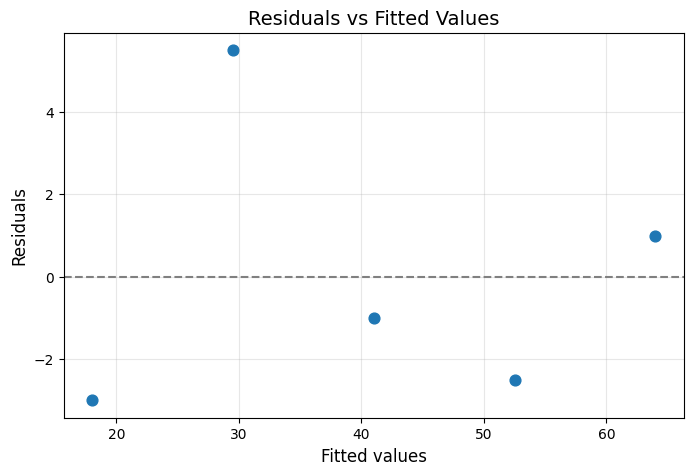

Residuals: [-3.   5.5 -1.  -2.5  1. ]
Residual std dev: 3.446

Assessment: If residual spread increases or decreases with fitted values, that indicates heteroscedasticity. Inspect the residuals scatterplot for patterns.


In [4]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = np.array([10,20,30,40,50]).reshape(-1,1)
y = np.array([15,35,40,50,65])

model = LinearRegression().fit(X,y)
preds = model.predict(X)
residuals = y - preds

plt.figure(figsize=(8,5))
plt.scatter(preds, residuals, s=60)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals vs Fitted Values', fontsize=14)
plt.xlabel('Fitted values', fontsize=12); plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

print('Residuals:', residuals.round(4))
print('Residual std dev:', residuals.std(ddof=1).round(4))
print('\nAssessment: If residual spread increases or decreases with fitted values, that indicates heteroscedasticity. Inspect the residuals scatterplot for patterns.')

## Question 10:  Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

**Answer:**

1. **Detect issues:** use residuals vs fitted, Breusch-Pagan test for heteroscedasticity and VIF/correlation for multicollinearity.
2. **Address heteroscedasticity:** transform target (log), use weighted least squares, or robust standard errors.
3. **Address multicollinearity:** remove/merge correlated predictors, use PCA, or regularization (Ridge/Lasso).
4. **Validate:** use cross-validation and compare RMSE/MAE on hold-out data.
5. **Feature engineering:** create domain-specific variables and interaction terms; iterate and document.